In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [2]:
friendship_pairs = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

In [3]:
# Inicializar el dict con una lista vacía para cada id de usuario:
friendships = {user["id"]: [] for user in users}
# Y pasar por todos los pares de amistad para llenarlo:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Agregar j como amigo de i
    friendships[j].append(i)  # Agregar i como amigo de j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [4]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)


total_connections = sum(number_of_friends(user) for user in users)

total_connections

24

In [5]:
num_users = len(users)  # longitud de la lista de usuarios
avg_connections = total_connections / num_users  # 24 / 10 == 2,4
avg_connections

2.4

In [6]:
# Crea una lista (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(  # Ordena la lista
    key=lambda id_and_friends: id_and_friends[1],  # por num_friends
    reverse=True,
)  # del mayor al menor

# Cada par es (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [7]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [
        foaf_id
        for friend_id in friendships[user["id"]]
        for foaf_id in friendships[friend_id]
    ]


foaf_ids_bad(users[0])

print(friendships[0])
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [8]:
from collections import Counter  # no cargado inicialmente


def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]  # Para cda uni de mis amigos
        for foaf_id in friendships[friend_id]  # encuentra sus amigos
        if foaf_id != user_id  # que no son yo
        and foaf_id  ## y no son mis amigos
        not in friendships[user_id]
    )


print(friends_of_friends(users[3]))  # contador ({0:2, %:1})

Counter({0: 2, 5: 1})


In [9]:
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [10]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who loke the target interest."""
    return [
        user_id
        for user_id, user_interest in interests
        if user_interest == target_interest
    ]


data_scientists_who_like("Java")

[0, 5, 9]

In [11]:
from collections import defaultdict

# Las claves son intereses, los valores son listsa de user_ids con ese interes
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [12]:
# Las claves son user_ids, los calores son listas de intereses para ese user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [13]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )


most_common_interests_with(users[0])

Counter({9: 3, 1: 2, 8: 1, 5: 1})

In [14]:
salaries_and_tenures = [
    (83000, 8.7),
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2),
]

In [15]:
# las claves conlos años, los valores son las listas de los salarios por antigüedad
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Las claves son años, cada valor es el slario medio para dicha antiguedad
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [16]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "menos de dos"
    elif tenure < 5:
        return "entre dos o cinco"
    else:
        return "más de cinco"


tenure_bucket(6)

'más de cinco'

In [17]:
# Las claves son buckets de años de antiguedad, los valores son las listas de salarios para bucket

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'más de cinco': [83000, 88000, 76000, 69000, 76000, 83000],
             'menos de dos': [48000, 48000],
             'entre dos o cinco': [60000, 63000]})

In [18]:
# Las claves son buckets de años de antigüedad, son los valores son el salario medio para cada bucket

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'más de cinco': 79166.66666666667,
 'menos de dos': 48000.0,
 'entre dos o cinco': 61500.0}

In [19]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "de pago"
    elif years_experience < 8.0:
        return "no de pago"
    else:
        return "de pago"


predict_paid_or_unpaid(2)

'de pago'

In [20]:
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [21]:
words_and_counts = Counter(
    word for user, interest in interests for word in interest.lower().split()
)

words_and_counts.most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

In [22]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)


big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [23]:
# El signo de almohadilla marca el comienzo de un cmentario. Python ignnora los comentarios, pero son útiles para cualquiera que lea el código.

for i in [1, 2, 3, 4, 5]:
    print(i)  # primera línea del bloque "for i"
    for j in [1, 2, 3, 4, 5]:
        print(j)  # primera línea del bloque "for j"
        print(i + j)  # última línea del bloque "for j"
    print(i)  # última línea del bloque "for i"
print("terminado el bucle")


1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
terminado el bucle


In [24]:
long_winded_computation = (
    1
    + 2
    + 3
    + 4
    + 5
    + 6
    + 7
    + 8
    + 9
    + 10
    + 11
    + 12
    + 13
    + 14
    + 15
    + 16
    + 17
    + 18
    + 19
    + 20
)

In [25]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
easier_to_read_list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [26]:
two_plus_three = 2 + 3

In [27]:
import re

my_regex = re.compile("[0-9]+", re.I)

In [28]:
import re as regex

my_regex = regex.compile("[0-9]+", regex.I)

In [29]:
from collections import defaultdict, Counter

lookup = defaultdict(int)  # valor predeterminado de 0 para claves nuevas
my_counter = Counter()  # contador vacío

In [30]:
match = 10
from re import *  # oh, ho, re tiene una funcion que se llama igual

print(match)  # "<function match at 0x10281e6a8"

<function match at 0x000001F6A590B060>


In [31]:
def double(x):
    """
    this is where you put an optional docstring that explains what the functions. For example, this function multiplies its input by 2.
    """
    return x * 2


double(4)

8

In [32]:
def apply_to_one(f):
    """
    Calls the function f with 1 as its argument"""
    return f(1)


my_double = double  # se refiere a la funcion anteriormente definida
x = apply_to_one(my_double)  # es igual a dos
x

2

In [33]:
y = apply_to_one(lambda x: x + 4)  # es igual a cinco
y

5

In [34]:
another_double = lambda x: 2 * x  # no haga esto


def another_double(x):
    """Do this instead"""
    return 2 * x

In [35]:
def my_print(menssaje="my default message"):
    print(menssaje)


my_print("hello")  # imprime "hello"
my_print()  # imprime "my default message"

hello
my default message


In [36]:
def full_name(first="What's s-his-name", last="Something"):
    return first + " " + last


full_name("Joel", "Grus")
# full_name("Joel")
# full_name(last="Grus")

'Joel Grus'

In [37]:
single_quoted_string = "date science"
double_quoted_string = "data science"

In [38]:
tab_string = "\t"  # representa el carácter del tabulador
len(tab_string)  # es igual a 1

1

In [39]:
not_tab_string = r"\t"  # representa los caracteres \ y t
len(not_tab_string)  # es igual a 2

2

In [40]:
multi_line_string = """this is the first line,
this is the second line
and this is the third line."""

In [41]:
first_name = "Joel"
last_name = "Grus"

In [42]:
full_name1 = first_name + " " + last_name  # suma de cadenas
full_name2 = "{0} {1}".format(first_name, last_name)  # formato de cadena
full_name3 = f"{first_name} {last_name}"

In [43]:
try:
    print(0 / 0)
except ZeroDivisionError:
    print("no se puede dividir por cero")

no se puede dividir por cero


In [44]:
integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [integer_list, heterogeneous_list, []]
list_length = len(integer_list)  # es igual a 3
list_sum = sum(integer_list)  # es igual a 6

list_length, list_sum, list_of_lists

(3, 6, [[1, 2, 3], ['string', 0.1, True], []])

In [45]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
zero = x[0]  # es igual a 0, las listas estásn indexadas al 0
one = x[1]  # es igual a 1
nine = x[-1]  # es igual a 9, 'pitónico' para el último elemento
eight = x[-2]  # es igual a 8, 'pitónico' para el penúltimo elemento
x[0] = -1  # ahora x es [-1,1,2,3,4,5,6,7,8,9]

In [46]:
first_three = x[:3]  # [-1, 1, 2]
three_to_end = x[3:]  # [3, 4, ..., 9]
one_to_four = x[1:5]  # [1, 2, 3, 4]
last_three = x[-3:]  # [7, 8, 9]
without_first_and_last = x[1:-1]  # [1, 2, ..., 8]
copy_of_x = x[:]  # [-1, 1, 2, ..., 9]

In [47]:
every_third = x[::3]  # [-1, 3, 6, 9]
five_to_three = x[5:2:-1]  # [5, 4, 3]

every_third, five_to_three

([-1, 3, 6, 9], [5, 4, 3])

In [48]:
1 in [1, 2, 3]  # True
0 in [1, 2, 3]  # False

False

In [49]:
x = [1, 2, 3]
x.extend([4, 5, 6])  # x es ahora [1, 2, 3, 4, 5, 6]

x

[1, 2, 3, 4, 5, 6]

In [50]:
x = [1, 2, 3]
y = x + [4, 5, 6]  # y es [1, 2, 3, 4, 5, 6]; x no ha cambiado

y

[1, 2, 3, 4, 5, 6]

In [51]:
x = [1, 2, 3]
x.append(0)  # x es ahora [1, 2, 3, 0]
y = x[-1]  # y es 0
z = len(x)  # z es 4

x, y, z

([1, 2, 3, 0], 0, 4)

In [52]:
x, y = [1, 2]  # ahora x es 1, y es 2
x, y

(1, 2)

In [53]:
_, y = [1, 2]  # ahora y == 2, no nos importa el primer elemento


In [54]:
my_list = [1, 2]
my_tuple = (1, 2)

other_tuple = 3, 4
my_list[1] = 3  # my_list es ahora [1, 3]
try:
    my_tuple[1] = 3
except TypeError:
    print("no se puede reasignar un valor en una tupla")

no se puede reasignar un valor en una tupla


In [55]:
def sum_and_product(x, y):
    return (x + y), (x * y)


se = sum_and_product(2, 3)  # se es (5, 6)
s, p = sum_and_product(5, 10)  # s es 15, p es 50

se, s, p

((5, 6), 15, 50)

In [56]:
x, y = 1, 2  # ahora x es 1, y es 2
x, y = y, x  # forma pitónica de intercambiar las variables; ahora x es 2 y es 1

x, y

(2, 1)

In [57]:
empty_dict = {}  # pitónico
empty_dict2 = dict()  # menos pitónico
grades = {"Joel": 80, "Tim": 95}  # dict literal

In [58]:
joels_grade = grades["Joel"]  # es igual a 80
joels_grade

80

In [59]:
try:
    kates_grade = grades["Kate"]
except KeyError:
    print("Kate no está en el diccionario de calificaciones")

Kate no está en el diccionario de calificaciones


In [60]:
joel_has_grade = "Joel" in grades  # es True
kate_has_grade = "Kate" in grades  # es False

joel_has_grade, kate_has_grade

(True, False)

In [61]:
joels_grade = grades.get("Joel", 0)  # es igual a 80
kates_grade = grades.get("Kate", 0)  # es igual a 0
no_ones_grade = grades.get("No One")  # es valor predeterminado None

joels_grade, kates_grade, no_ones_grade

(80, 0, None)

In [62]:
grades["Tim"] = 90  # reeplaza el valor anterior
grades["Kate"] = 100  # añade una tercera entrada
num_students = len(grades)  # es igual a 3

grades, num_students

({'Joel': 80, 'Tim': 90, 'Kate': 100}, 3)

In [63]:
tweet = {
    "user": "joelgrus",
    "text": "Data Science is Awesome",
    "retweet_count": 100,
    "hashtags": ["#data", "#science", "#awesome", "yolo"],
}

tweet

{'user': 'joelgrus',
 'text': 'Data Science is Awesome',
 'retweet_count': 100,
 'hashtags': ['#data', '#science', '#awesome', 'yolo']}

In [64]:
tweet_keys = tweet.keys()  # interable para las claves
tweet_values = tweet.values()  # interable para los valores
tweet_items = tweet.items()  # interable para las tuplas (clave, valor)
"user" in tweet_keys  # True, pero no pitonico
"user" in tweet  # forma pitónica de comprobar claves
"joelgrus" in tweet_values  # True (es lenta, pero la única forma de verificar)

True

In [65]:
document = ["data science", "big data", "data engineering"]

word_counts = {}

for word in document:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [66]:
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

In [67]:
word_counts = {}
for word in document:
    previous_counts = word_counts.get(word, 0)
    word_counts[word] = previous_counts + 1

In [68]:
from collections import defaultdict

word_counts = defaultdict(int)
for word in document:
    word_counts[word] += 1

In [69]:
dd_list = defaultdict(list)  # list() produce una lista vacía
dd_list[2].append(1)  # ahora dd_list contiene {2: [1]}
dd_dict = defaultdict(dict)  # dict() produce un dict vacío
dd_dict["Joel"]["City"] = "Seattle"  # {"Joel" : {"City": Seattle"}}
dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1  # ahora dd_pair contiene {2: [0, 1]}

In [70]:
from collections import Counter

c = Counter([0, 1, 2, 0])
c

Counter({0: 2, 1: 1, 2: 1})

In [71]:
# Recuerde, document es una lista de palabras
word_counts = Counter(document)
word_counts

Counter({'data science': 1, 'big data': 1, 'data engineering': 1})

In [72]:
# imprime las 10 palabras más comunes y sus contadores
for word, count in word_counts.most_common(10):
    print(word, ":", count)

data science : 1
big data : 1
data engineering : 1


In [73]:
primes_below_10 = {2, 3, 5, 7}

In [74]:
s = set()
s.add(1)  # s es ahora {1}
s.add(2)  # s es ahora {1, 2}
s.add(2)  # s sigue siendo {1, 2}
x = len(s)  # es igual a 2
y = 2 in s  # es igual a True
z = 3 in s  # es igual a False

In [75]:

stopwords_list = ["a", "an", "at"] + ["yet", "you"]
"zip" in stopwords_list  # False, pero hay que verificar cada elemento
stopwords_set = set(stopwords_list)
"zip" in stopwords_set  # mucho más rápido

False

In [76]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)  # 6
item_set = set(item_list)  # {1, 2, 3}
num_distinct_items = len(item_set)  # 3
distinct_item_list = list(item_set)  # [1, 2, 3]

item_list, num_items, num_distinct_items, distinct_item_list

([1, 2, 3, 1, 2, 3], 6, 3, [1, 2, 3])

In [77]:
if 1 > 2:
    message = "if only 1 were greater than two..."
elif 1 < 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"

In [78]:
parity = "even" if x % 2 == 0 else "odd"

parity

'even'

In [79]:
x = 0
while x < 10:
    print(f"{x} is less than 10")
    x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [80]:
# rande(10) en los numeros0,1,...,9
for x in range(10):
    print(f"{x} is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [81]:
for x in range(10):
    if x == 3:
        continue  # ca inmediatamente a la siguiente repeticion
    if x == 5:
        break  # sale del bucle por completo
    print(x)

0
1
2
4


In [82]:
one_is_less_than_two = 1 < 2  # es igual a True
true_equals_false = True == False  # es igual a False

In [83]:
x = None
assert x == None, "this is the not the Pythonic way to check fo None"
assert x is None, "this is the Pythonic way to check for None"

In [84]:
s = "Hello python"
first_char = s[0] if s else ""
first_char = s and s[0]  # forma mas rapida

In [85]:
safe_x = x or 0

safe_x = x if x is not None else 0

safe_x

0

In [86]:
all([True, 1, {3}])  # True, todos son verdaderos
all([True, 1, {}])  # False, {} is falso
any([True, 1, {}])  # True, True is verdadero
all([])  # True, no hay elementos falsos en la lista
any([])  # False, no hay elementos verdaderos en la lista

False

In [87]:
x = [4, 1, 2, 3]
y = sorted(x)  # y es [1, 2, 3, 4]; x no ha cambiado
x.sort()  # ahora x es [1, 2, 3, 4]

y, x

([1, 2, 3, 4], [1, 2, 3, 4])

In [88]:
# ordena la lista por valor absoluto de mayor a menor
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)  # is [-4, 3, -2, 1]

# ordena las palabras y contadores del contador mayor al meor
wc = sorted(
    word_counts.items(), key=lambda word_and_count: word_and_count[1], reverse=True
)

x, wc

([-4, 3, -2, 1],
 [('data science', 1), ('big data', 1), ('data engineering', 1)])

In [89]:
even_numbers = [x for x in range(5) if x % 2 == 0]  # [0, 2, 4]
squares = [x * x for x in range(5)]  # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers]  # [0, 4, 16]

even_numbers, squares, even_squares

([0, 2, 4], [0, 1, 4, 9, 16], [0, 4, 16])

In [90]:
zeros = [0 for _ in even_numbers]  # tiene la misma longitud que even_numbers
zeros

[0, 0, 0]

In [91]:
increasing_pairs = [
    (x, y)  # solo pares con x < y
    for x in range(10)  # range(bajo, alto) es igual a
    for y in range(x + 1, 10)
]  # [bajo, bajo+1, ... alto-1]

increasing_pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [92]:
assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"

In [93]:
def smallest_item(xs):
    return min(xs)


assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

smallest_item([10, 20, 5, 40])

5

In [94]:
def smallest_item(xs):
    assert xs, "empty list has no smallest item"
    return min(xs)


smallest_item([10, 20, 5, 40])

5

In [95]:
class CountingClicker:
    """A class can/should have a doctring, just like a function"""

    def __init__(self, count: int = 0):
        self.count = count

    def __repr__(self):
        return f"CountingClicker(count={self.count})"

    def click(self, num_times=1):
        """Click the clicker some number of times."""
        self.count += num_times

    def read(self):
        return self.count

    def reset(self):
        self.count = 0


# --- ZONA DE PRUEBAS ---

print("1. Creando el clicker...")
clicker = CountingClicker()
# Esto usa tu método __repr__ automáticamente
print(f"   Estado actual: {clicker}") 

# Prueba 1: Verificar inicio
assert clicker.read() == 0, "clicker should start with count 0"
print("   ✅ Prueba de inicio pasada.")

print("2. Haciendo clicks...")
clicker.click()
clicker.click()
print(f"   Estado actual: {clicker}")

# Prueba 2: Verificar conteo (Ojo: hiciste 2 clicks, así que esperamos un 2)
assert clicker.read() == 2, "after two clicks, count should be 2"
print("   ✅ Prueba de conteo pasada.")

print("3. Reseteando...")
clicker.reset()
print(f"   Estado actual: {clicker}")

# Prueba 3: Verificar reset
assert clicker.read() == 0, "after reset, count should be back to 0"
print("   ✅ Prueba de reset pasada.")

print("-" * 30)
print("¡ÉXITO! Todas las aserciones son correctas.")



1. Creando el clicker...
   Estado actual: CountingClicker(count=0)
   ✅ Prueba de inicio pasada.
2. Haciendo clicks...
   Estado actual: CountingClicker(count=2)
   ✅ Prueba de conteo pasada.
3. Reseteando...
   Estado actual: CountingClicker(count=0)
   ✅ Prueba de reset pasada.
------------------------------
¡ÉXITO! Todas las aserciones son correctas.


In [96]:
clicker1 = CountingClicker()  # inicializado a 0
clicker2 = CountingClicker(100)  # empieza con count=100
clicker3 = CountingClicker(count=100)  # forma más explícita de hacer lo mismo

In [97]:
# una subclase hereda todo el comportamiento de su clase padre.
class NoResetClicker(CountingClicker):
    # esta clase tien los mismos metodo de CountingClicker
    # salvo que tiene su metodo reset que no hace nada
    def reset(self):
        pass

clicker2 = NoResetClicker()
assert clicker2.read() == 0
clicker2.click()
assert clicker2.read() == 1
clicker2.reset()
assert clicker2.read() == 1, "reset shouldn't do anytihing"

In [98]:
def generate_range(n):
    i = 0
    while i < n:
        yield I         # cada llamada a yield produce un valor del generador 
        i += 1
generate_range(2)

<generator object generate_range at 0x000001F6AB077700>

In [99]:
for i in generate_range(10):
    print(f"i: {i}")

i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE


In [100]:
def natural_numbers():
    """return 1,2,3,..."""

    n = 1
    while True:
        yield n
        n+=1

natural_numbers()

<generator object natural_numbers at 0x000001F6AB077940>

In [101]:
evens_velow_20 = (i for i in generate_range(20) if i % 2 == 0)
evens_velow_20

<generator object <genexpr> at 0x000001F6AB299490>

In [102]:
# ninguno de estos calculos *hace* nada hasta que iteramos
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)
even_squares = (x ** 2 for x in evens)
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)

evens, even_squares, even_numbers

(<generator object <genexpr> at 0x000001F6AB298380>,
 <generator object <genexpr> at 0x000001F6AB29A5A0>,
 [0, 2, 4])

In [103]:
names = ["Alice","Bob","Charlie","Debbie"]

# no pitonico
for i in range(len(names)):
    print(f"name {i} is {names[i]}")

# tampoco pitonico
i = 0
for name in names:
    print(f"name {i} is {names[i]}")

# pitonico
for i, name in enumerate(names):
    print(f"name {i} is {name}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [104]:
import random

random.seed(10)         # esto asegura que obtenemos los mismo resultadoscada vez

four_unifirm_randoms = [random.random() for i in range(4)]

In [105]:
random.seed(10)             # establece la semilla en 10
print(random.random())      # 0.5714025946899135
random.seed(10)             # reinicia la semilla en 10
print(random.random())      # 0.5714025946899135 de nuevo

0.5714025946899135
0.5714025946899135


In [106]:
random.randrange(10)        # selecciona aleatoriamente de range(10) = [1,2,3,... ,9]
random.randrange(3,6)       # selecciona aleatoriamente de range(3,6) =[3,4,5]

4

In [107]:
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(up_to_ten)
print(up_to_ten)                                # [7, 2, 6, 8, 9, 4, 10, 1, 3,5] (sus resultados serán probablementediferentes)

[5, 6, 9, 2, 3, 7, 8, 4, 1, 10]


In [108]:
my_best_friend = random.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Bob'

In [109]:
lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6)

winning_numbers

[4, 15, 47, 23, 2, 26]

In [110]:
four_with_replacement = [random.choice(range(10)) for _ in range(4)]
print(four_with_replacement)

[2, 9, 5, 6]


In [111]:
import re 

re_examples = [
    not re.match("a","cat"),                    # todas son True
    re.search("a","cat"),                       # 'cat' no empieza por 'a'
    not re.search("c","dog"),                   # 'cat' contiene una 'a'
    3 == len(re.split("[ab]","carbs")),         # partido en a o b para ['c','r','s']
    "R-D-" == re.sub("[0-9]","-","R2D2")        # reemplaza digitos por guiones
]

assert all(re_examples), "all the regex examples should be True"

In [112]:
list1 = ['a','b','c']
list2 = [1,2,3]

# zip es perezoso, de modo que hay que hacer algo como lo siguiente
[pair for pair in zip(list1,list2)]                 # es [('a',1),('b',2),('c',3)]

[('a', 1), ('b', 2), ('c', 3)]

In [113]:
pairs = [('a', 1), ('b', 2), ('c', 3)]
letters, numbers = zip(*pairs)

letters, numbers

(('a', 'b', 'c'), (1, 2, 3))

In [114]:
letters, numbers = zip(('a', 1), ('b', 2), ('c', 3))

letters, numbers

(('a', 'b', 'c'), (1, 2, 3))

In [115]:
def add(a,b): return a + b
add(1,2)                        # devuelve 3
try:
    add([1,2])
except TypeError:
    print(" add exepcts two inputs")
add(*[1,2])                     # devuelve 3

 add exepcts two inputs


3

In [116]:
def doubler(f):
    # Aqui definimos una nueva funcion que mantien una referencia a f
    def g(x):
        return 2 * f(x)
    # y devuelve esa nueva funcion
    return g

doubler(4)

<function __main__.doubler.<locals>.g(x)>

In [117]:
def f1(x):
    return x + 1

g = doubler(f1)
assert g(3) == 8, "(3+1) * 2 should equal 8"
assert g(-1) == 0, "(-1+1) * 2 should equals 0"

In [118]:
def f2(x,y):
    return x + y

g = doubler(f2)
try:
    g(1,2)
except TypeError:
    print("cas defined, g only takes one argument")

cas defined, g only takes one argument


In [119]:
def magic(*args, **kwargs):
    print("unnamed args:",args)
    print("keyword args:",kwargs)

magic(1,2,key="word", key2="word2")
# imprime
# argumentos sin nombre: (1,2)
# argumentos de la palabra clave: {'key':'word','key2':'word2'}


unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [120]:
def other_way_magic(x,y,z):
    return x + y + z

x_y_list = [1,2]
z_dict = {"z":3}

assert other_way_magic(*x_y_list, **z_dict) == 6, "1 + 2 + 3 should be 6+ "

In [121]:
def doubler_correct(f):
    """works no matter what kind of inputs f expects"""
    def g(*args, **kwargs):
        """whatever arguments g is supplied, pas them through to f"""
        return 2 * f(*args, **kwargs)
    return g

def f2(x,y):
    return x + y

g = doubler_correct(f2)

assert g(1,2) == 6, "doubler should work now"

In [122]:
def add(a, b):
    return a + b

assert add(10, 5) == 15, "+ is valid for numbers"
assert add([1,2],[3]) == [1,2,3], "+ is valid for lists"
assert add("hi ","there") == "hi there", "+ is valid for strings"

try:
    add(10, "five")
except TypeError:
    print("cannot add an int to a string")

cannot add an int to a string


In [123]:
def add(a: int, b: int) -> int:
    return a + b

add(10,5)                   # le gustaria que esto fuera correcto
add("hi ", "there")         # le gustaria que esto no fuera correcto

'hi there'

In [124]:
def dot_product(x,y):
    # aun no hemos definido Vector, pero imaginese que lo habiamos echo
    def dot_product(x: Vector, y: Vector) -> float:
        pass

In [125]:
from typing import Union
def secretly_ugly_function(value, operation): ...
def ugly_function(value: int,
operation: Union[str, int, float, bool]) -> int:
    pass

In [126]:
def total(xs: list) -> float:
    return sum(total)

In [127]:
from typing import List         # observe la L mayuscula
def total(xs: List[float]) -> float:
    return sum(total)

In [128]:
# Así es como se anota el tipo de variables cuando se definen.
# Pero esto es innecesario; es "obvio" que x es un int.
x: int = 5

In [129]:
values = []             # ¿cuál es mi tipo?
best_so_far = None      # ¿cuál es mi tipo?

In [130]:
from typing import Optional
values: List[int]=[]
best_so_far: Optional[float] = None         # permitido ser un float o None

In [131]:
from typing import Dict, Iterable, Tuple

lazy = True  # Necesitas definir esto antes del 'if'
# ----------------------------------------------

# las claves son strings, los valores son ints
counts: Dict[str, int] = {'data': 1, 'science': 2}

# las listas y los generadores son ambos iterables
if lazy:
    evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
    # Nota: También es buena práctica mantener la consistencia en el tipado aquí
    evens: Iterable[int] = [0, 2, 4, 6, 8]

# las tuplas especifican un tipo para cada elemento
triple: Tuple[int, float, int] = (10, 2.3, 5)

In [132]:
from typing import Callable
# La comprobación de tipos dice que el repetidor es una función que admite
# dos argumentos, un string y un int, y devuelve un string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
    return repeater(s, 2)
def comma_repeater(s: str, n: int) -> str:
    n_copies = [s for _ in range(n)]
    return ', '.join(n_copies)

assert twice(comma_repeater, "type hints") == "type hints, type hints"

In [133]:
Number = int
Numbers = List[Number]

def total(xs:Numbers) -> Number:
    return sum(xs)

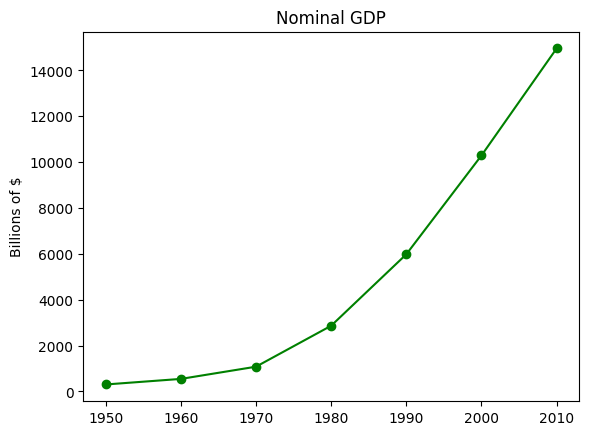

In [1]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# crea un gráfico de líneas, años en el eje x, cantidades en el eje y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# añade un título
plt.title("Nominal GDP")
# añade una etiqueta al eje y
plt.ylabel("Billions of $")
plt.show()